# 💘 Ayudantía 5: Ajuste de mínimos cuadrados

## Pablo Zurita Soler (pzurita@uc.cl)

Muchas veces, vamos a tener un modelo físico que, sujeto a parámetros, **creemos que** determina algún fenómeno. Esta situación puede representarse abstractamente por

\begin{align}
    f : V \times \Theta & \to W \\
    (\boldsymbol{x}, \boldsymbol{\theta}) & \mapsto \boldsymbol{y}
\end{align}

es decir, $f$ es nuestro modelo que dado un _input_ $\boldsymbol{x}$ y ciertos parámetros representados como entradas de un vector $\boldsymbol{\theta}$, entregue un _output_ $\boldsymbol{y}$ que **creemos** que refleja la realidad. Un problema común en ciencias e ingeniería es, dados ciertos datos $\{(\boldsymbol{x}_{i}, \boldsymbol{y}_{i})\}_{i}$ intentar determinar qué parámetros de mi modelo son necesarios para que este pueda representar (de mejor manera) el fenómeno que dio paso a esos datos.

Hay muchas maneras de aproximarse a este [**problema inverso**](https://en.wikipedia.org/wiki/Inverse_problem) de determinar qué se necesita para producir el _output_. La que vamos a explorar aquí es una de las más simples, y es una que, de hecho, probablemente ya han utilizado: **mínimos cuadrados**.

La idea es la siguiente: dado que queremos reproducir los datos, podemos definir el error de nuestra estimación, dado un input $\boldsymbol{x}_{i}$ como

$$
    e_{i} := \lVert f(\boldsymbol{x}_{i}, \boldsymbol{\theta}) - \boldsymbol{y}_{i} \rVert
$$

y luego queremos encontrar los parámetros que **minimizan** el error. Si $W \subset \mathbb{R}$, lo anterior es equivalente a

$$
    \min_{\boldsymbol{\theta}} \lvert f(\boldsymbol{x}_{i}, \boldsymbol{\theta}) - y_{i} \rvert^{2}
$$

y si queremos que esto suceda para todas las observaciones, tenemos entonces

$$
    \min_{\boldsymbol{\theta}} \sum_{i} \lvert f(\boldsymbol{x}_{i}, \boldsymbol{\theta}) - y_{i} \rvert^{2} \text{.}
$$

Este es un problema de optimización que en muchas ocasiones es "bien portado". Esto es, se puede resolver de diversas maneras distintas con relativa confianza en que la solución es buena. Si las funciones son lineales, por ejemplo, ustedes probablemente resolvieron este problema en Álgebra Lineal utilizando proyección ortogonal.

Nosotros resolveremos este problema de manera numérica haciendo uso de la librería `scipy`, en específico su módulo `scipy.optimize`. Consideremos el siguiente ejemplo. Imaginemos que

$$
    f(x, \boldsymbol{\theta}) = \theta_{1} - \left( x - \frac{\theta_{2}}{x^{2}} \right)
$$

y que tenemos datos

$$
    \mathbf{y} = (0, 0.008936176, 0.01787232, 0.02382976, 0.04765952) \text{.}
$$

asociados a los puntos

$$
    \mathbf{x} = (0, 0.0097561, 0.0184669, 0.023345, 0.0348432)
$$

In [1]:
import scipy.optimize as sp
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
y_data = np.array([0.008936176, 0.01787232, 0.02382976, 0.04765952])
x_data = np.array([0.0097561, 0.0184669, 0.023345, 0.0348432])

def f(c, x):
    c1, c2 = c
    return c1 - (x - (c2/x**2))

La función `leastsq` del módulo `scipy.optimize` realiza optimización numérica sobre el problema de mínimos cuadrados dado un planteamiento como el anterior. La optimización numérica utiliza un punto de partida (y, en general, este punto de partida puede afectar el resultado de la optimización). Por ahora, escojamos arbitrariamente un vector inicial, las propiedades del problema, y las exigencias del curso, nos permiten tomarnos esos lujos. Debemos además definir el error.

In [3]:
c_0 = [1, 1]

def error(c, x, y):
    return abs(y - f(c, x))

Ahora, llamando a la función, podemos encontrar el óptimo.

In [4]:
c_fit, cov_c = sp.leastsq(func=error, x0=c_0, args=(x_data, y_data))

`c_fit` retorna los parámetros ajustados, y `cov_c` retorna una medida de la geometría del punto óptimo encontrado (Para les curioses, busquen en la documentación qué significa. Es una matriz Hessiana inversa, pero eso interesa más en cursos de optimización que aquí).

In [5]:
c_fit

array([ 6.59279319e-02, -4.90786933e-06])

Podemos visualizar lo que sucedió ahora gráficamente, pues podemos **simular** utilizando los parámetros ajustados.

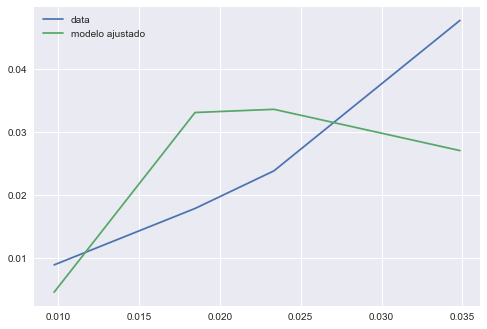

In [7]:
plt.figure()
plt.plot(x_data, y_data, label='data')
plt.plot(x_data, f(c_fit, x_data), label='modelo ajustado')
plt.legend()
plt.show()

De este gráfico podemos ver que nuestro modelo funcionó... bastante mal. De esto tendríamos que concluir que, a la luz de los datos **disponibles**, $f$ no es un buen modelo del comportamiento visto en los datos. ¿Quizás hay otro modelo que sirva mejor?

In [8]:
def g(c, x):
    return c[0] + c[1]*x + c[2]*x**2

c_0 = [1, 1, 1]

def error_g(c, x, y):
    return abs(y - g(c, x))

c_fit_g, cov_c = sp.leastsq(func=error_g, x0=c_0, args=(x_data, y_data))

Veamos que pasa con este **modelo cuadrático**.

In [9]:
c_fit_g

array([ 6.26561648e-03, -6.27063686e-02,  3.58291785e+01])

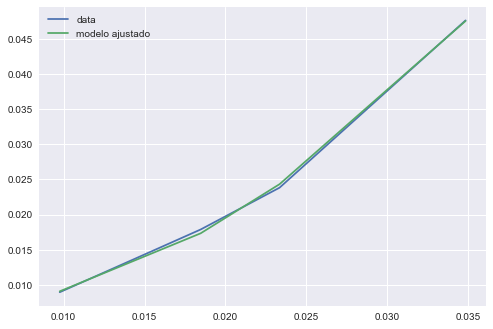

In [10]:
plt.figure()
plt.plot(x_data, y_data, label='data')
plt.plot(x_data, g(c_fit_g, x_data), label='modelo ajustado')
plt.legend()
plt.show()

¡Ajá! Pareciera que un modelo cuadrático captura bastante mejor el comportamiento de los datos. Por supuesto, esto **no significa mucho desde el punto de vista físico**. Recordemos que uno puede aproximar cualquier función real continua en un intervalo cerrado y acotado (compacto) arbitrariamente bien utilizando polinomios (los señores Weierstrass y Stone nos entregaron [este bello resultado](https://en.wikipedia.org/wiki/Stone%E2%80%93Weierstrass_theorem)), así que por supuesto que uno puede jugar con un modelo hasta ajustar perfecto a **cualquier conjunto de datos**. Lo que nos interesa (al menos a nosotros) es que un modelo con **interpretación física** se ajuste bien.